## Table of contents
1. [Introduction](#Introduction)
2. [Quickstart](#Quickstart)
3. [Applying styles](#Applying-styles)
4. [Relative positioning](#Relative-positioning)

## Introduction

## Quickstart

In [1]:
import tempfile
import os
import time

In [2]:
import IPython.display
import skia

In [3]:
import momapy.sbgn.io
import momapy.sbgn.styling
import momapy.sbgn.utils
import momapy.rendering
import momapy.rendering.skia
import momapy.builder
import momapy.coloring
import momapy.styling

In [4]:
from momapy.demo.utils import display, show_room

Fontconfig warning: "/usr/share/fontconfig/conf.avail/05-reset-dirs-sample.conf", line 6: unknown element "reset-dirs"


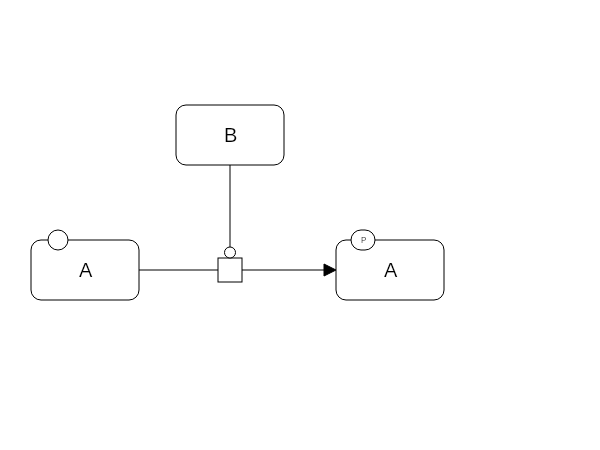

In [5]:
m1 = momapy.sbgn.io.read_file("phospho1.sbgn")
display(m1)

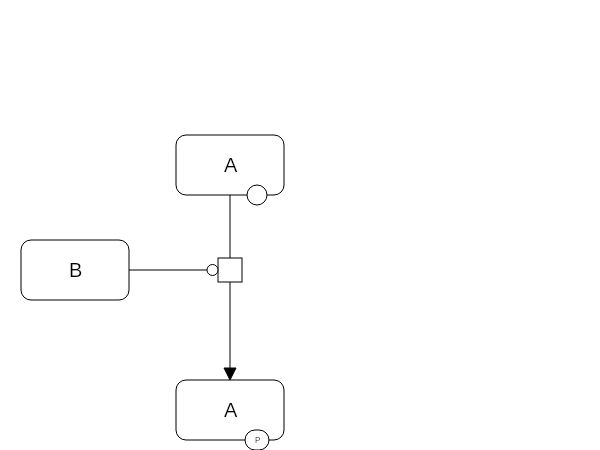

In [6]:
m2 = momapy.sbgn.io.read_file("phospho2.sbgn")
display(m2)

In [7]:
m1 == m2

False

In [8]:
m1.layout == m2.layout

False

In [9]:
m1.model == m2.model

True

In [10]:
try:
    m1.layout.stroke = momapy.coloring.colors.red
except Exception as e:
    print(e)

cannot assign to field 'stroke'


In [11]:
m1_builder = momapy.builder.builder_from_object(m1)

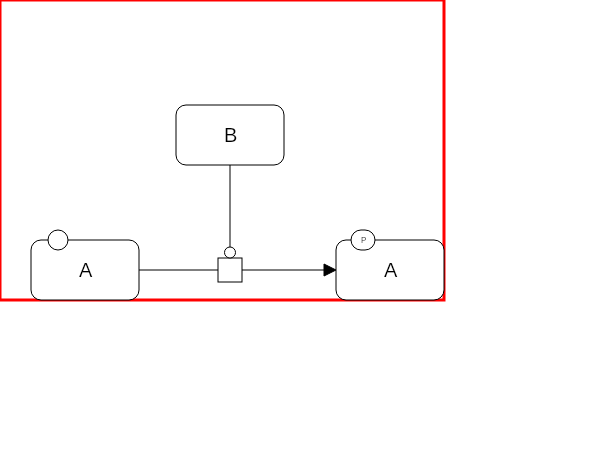

In [12]:
m1_builder.layout.stroke = momapy.coloring.colors.red
m1_builder.layout.stroke_width = 3
display(m1_builder)

In [13]:
m1_builder = momapy.sbgn.io.read_file("phospho1.sbgn", return_builder=True)

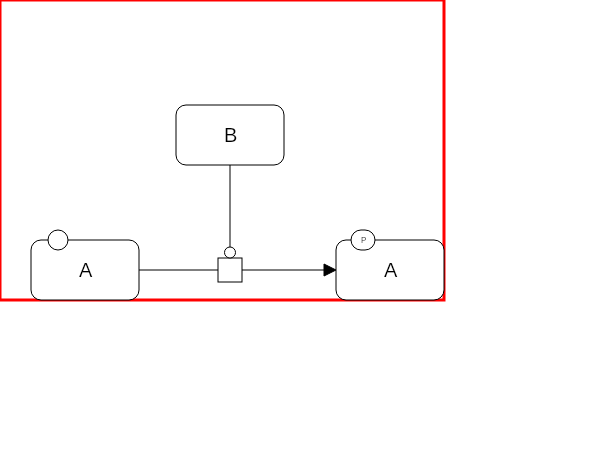

In [14]:
m1_builder.layout.stroke = momapy.coloring.colors.red
m1_builder.layout.stroke_width = 3
display(m1_builder)

In [15]:
m1 = momapy.sbgn.io.read_file("phospho1.sbgn")
m1_builder = momapy.builder.builder_from_object(m1)
m1 == m1_builder.build()

True

### So what is the purpose of the non builder object?

In [16]:
m1a_builder = momapy.sbgn.io.read_file("phospho1.sbgn", return_builder=True)
m1b_builder = momapy.sbgn.io.read_file("phospho1.sbgn", return_builder=True)
m1a_builder == m1b_builder

False

In [17]:
m1a = m1a_builder.build()
m1b = m1b_builder.build()
m1a == m1b

True

In [18]:
m1_builder = momapy.sbgn.io.read_file("phospho1.sbgn", return_builder=True)
m1_builder.layout.stroke_width = 3
m1_builder.layout.stroke = momapy.coloring.colors.red
m1 = m1_builder.build()

In [19]:
s = set([])
for i in range(256):
    for j in range(0):
            m1_builder.layout.stroke = momapy.coloring.rgba(i, j, 0, 1.0)
            s.add(m1_builder.build())
l = list(s)

In [20]:
%%time
m1 in s

CPU times: user 106 µs, sys: 35 µs, total: 141 µs
Wall time: 145 µs


False

In [21]:
%%time
m1 in l

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs


False

### Submap

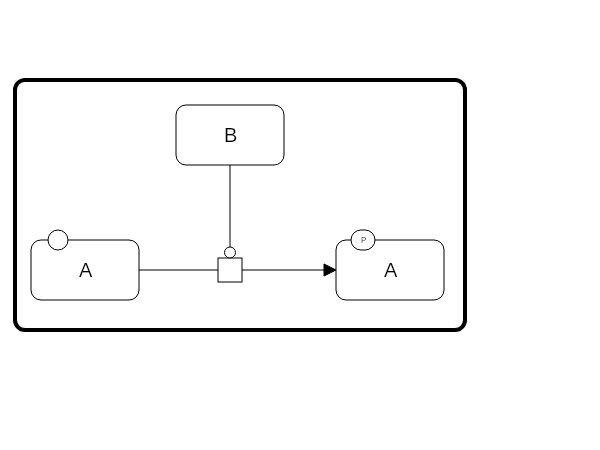

In [22]:
m1_builder = momapy.sbgn.io.read_file("phospho1comp.sbgn", return_builder=True)
m1 = m1_builder.build()
display(m1)

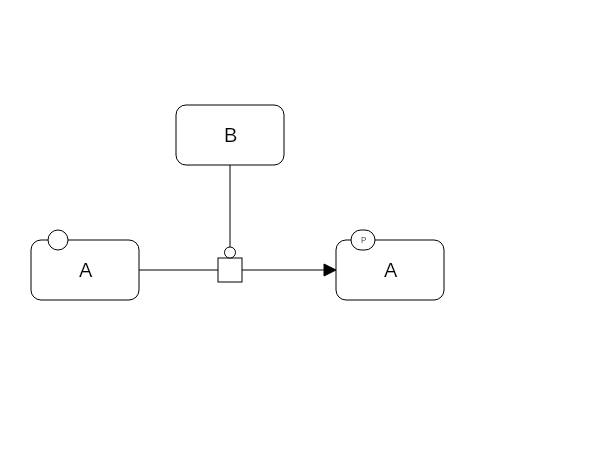

In [23]:
m2_builder = momapy.sbgn.io.read_file("phospho1.sbgn", return_builder=True)
m2_builder.layout.position = m1_builder.layout.position
m2_builder.layout.width = m1_builder.layout.width
m2_builder.layout.height = m1_builder.layout.height
m2 = m2_builder.build()
display(m2)

In [24]:
m1.is_submap(m2)

False

In [25]:
m1.layout.is_sublayout(m2.layout)

True

In [26]:
m1.model.is_submodel(m2.model)

False

## Applying styles

In [27]:
m1_builder = momapy.sbgn.io.read_file("phospho1.sbgn", return_builder=True)
m1_builder.layout.stroke = momapy.coloring.colors.purple
momapy.sbgn.utils.set_layout_to_fit_content(m1_builder, xsep=10, ysep=10)

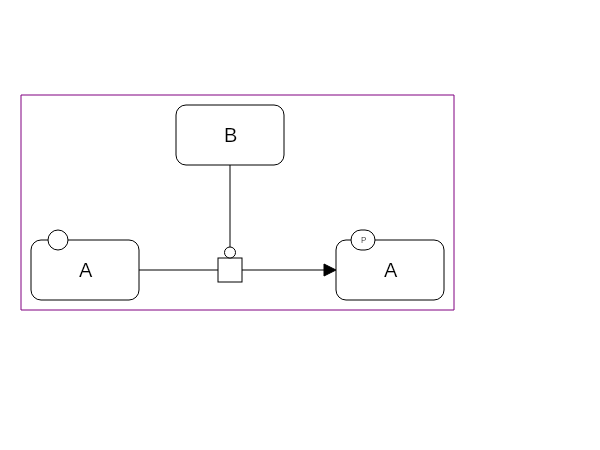

In [28]:
display(m1_builder)

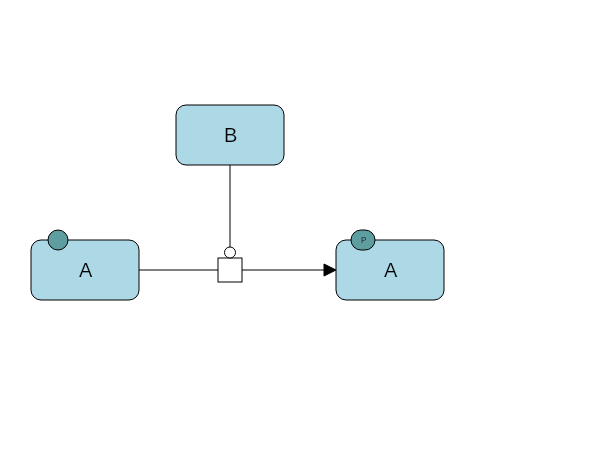

In [29]:
momapy.styling.apply_style_sheet(m1_builder.layout, momapy.sbgn.styling.default_colorscheme)
display(m1_builder)

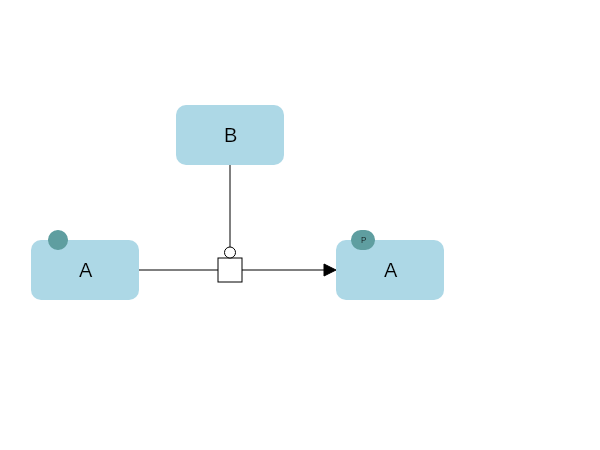

In [30]:
momapy.styling.apply_style_sheet(m1_builder.layout, momapy.sbgn.styling.shadows)
display(m1_builder)

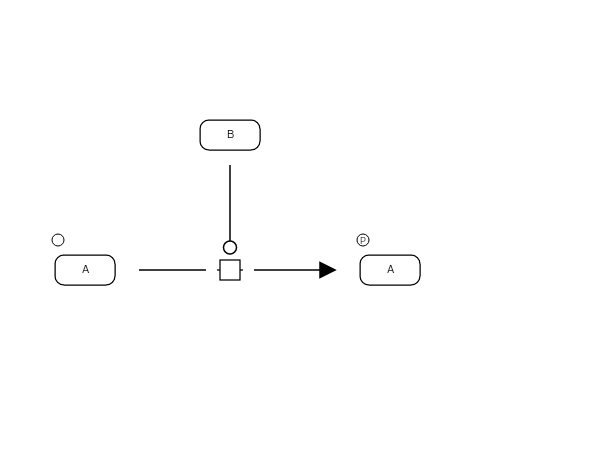

In [31]:
momapy.styling.apply_style_sheet(m1_builder.layout, momapy.sbgn.styling.newt)
display(m1_builder)

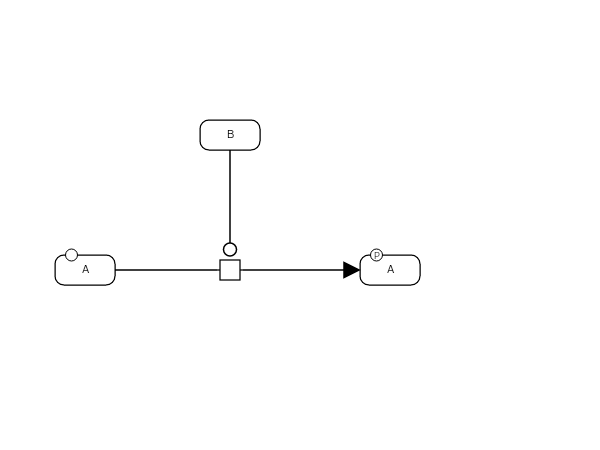

In [32]:
momapy.sbgn.utils.set_auxilliary_units_to_borders(m1_builder)
momapy.sbgn.utils.set_arcs_to_borders(m1_builder)
display(m1_builder)

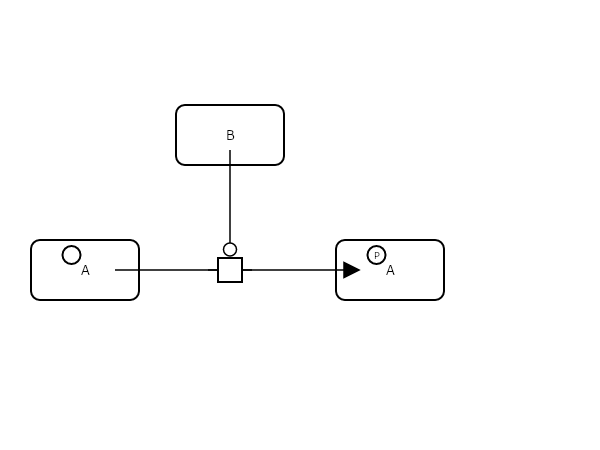

In [33]:
momapy.styling.apply_style_sheet(m1_builder.layout, momapy.sbgn.styling.vanted)
display(m1_builder)

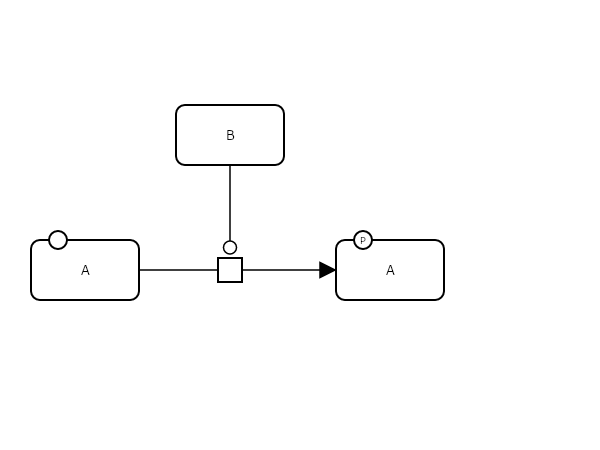

In [34]:
momapy.sbgn.utils.set_auxilliary_units_to_borders(m1_builder)
momapy.sbgn.utils.set_arcs_to_borders(m1_builder)
display(m1_builder)

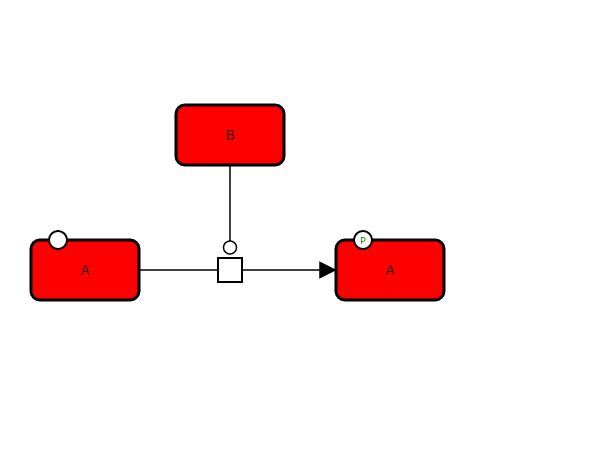

In [35]:
s = """
    MacromoleculeLayout {
        stroke_width: 3;
        fill: red;
    }
    
    StateVariableLayout > TextLayout {
        font_color: green;
    }
    """
my_style_sheet = momapy.styling.read_string(s)
momapy.styling.apply_style_sheet(m1_builder.layout, my_style_sheet)
display(m1_builder)

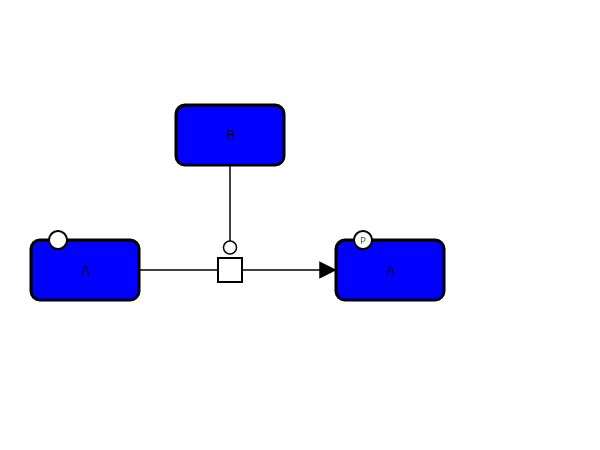

In [36]:
s = s.replace("red", "blue")
with open("my_style_sheet.css", "w") as f:
    f.write(s)
my_style_sheet = momapy.styling.read_file("my_style_sheet.css")
momapy.styling.apply_style_sheet(m1_builder.layout, my_style_sheet)
display(m1_builder)

## Relative positioning

In [37]:
MacromoleculeLayoutBuilder = momapy.builder.get_or_make_builder_cls(momapy.sbgn.pd.MacromoleculeLayout)
m = MacromoleculeLayoutBuilder(
        position=momapy.geometry.PointBuilder(225, 150),
        width=300,
        height=150,
        stroke_width=1,
        rounded_corners=15,
        stroke=momapy.coloring.colors.black,
)

In [38]:
m.north_west()

Point(x=85.0, y=80.0)

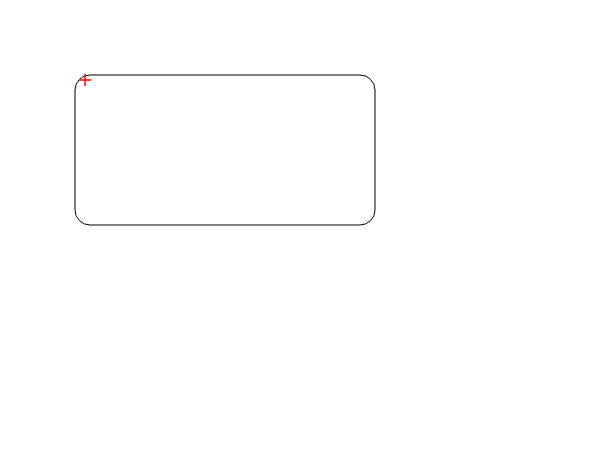

In [39]:
CrossPointBuilder = momapy.builder.get_or_make_builder_cls(momapy.shapes.CrossPoint)
cross_point = CrossPointBuilder(
    width=12.0,
    height=12.0,
    stroke_width=1.5,
    stroke=momapy.coloring.colors.red
)
cross_point.position = m.north_west()
m.add_element(cross_point)
display(m)

All nodes have at least the following anchor points:
* north_west
* north
* north_east
* east
* south_east
* south
* south_west
* west
* center
* label_center

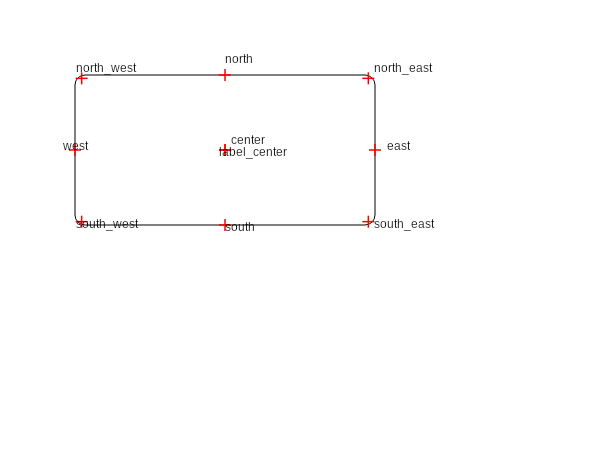

In [40]:
show_room(momapy.sbgn.pd.MacromoleculeLayout)

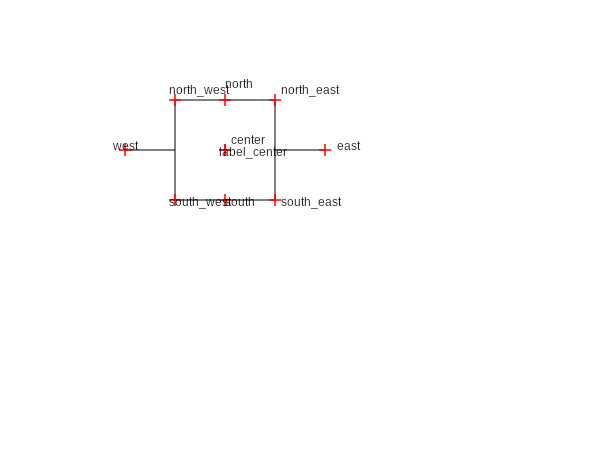

In [41]:
show_room(momapy.sbgn.pd.GenericProcessLayout)

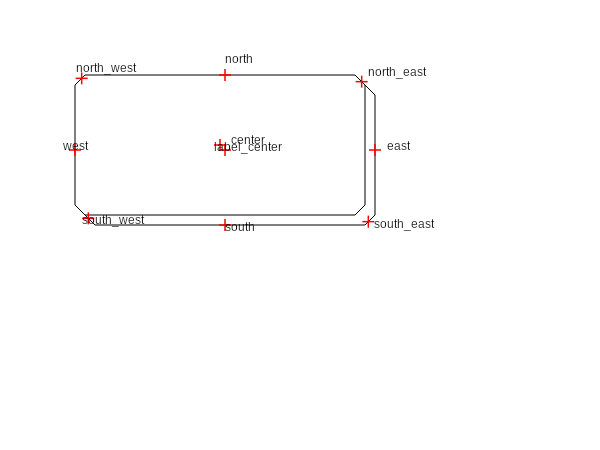

In [42]:
show_room(momapy.sbgn.pd.ComplexMultimerLayout)

In [43]:
m.self_angle(120)

Point(x=181.69872981077808, y=75.0)

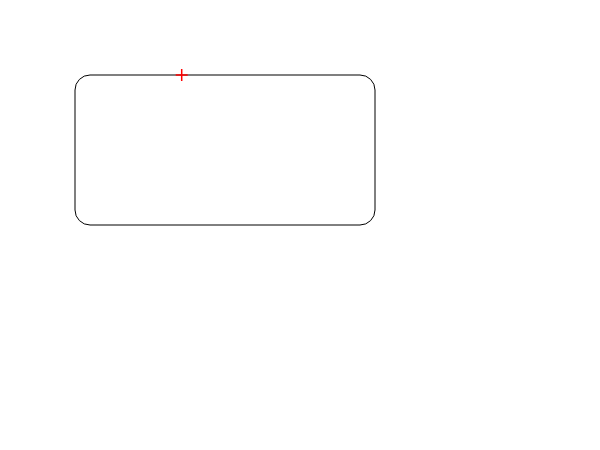

In [44]:
cross_point.position = m.self_angle(120)
display(m)

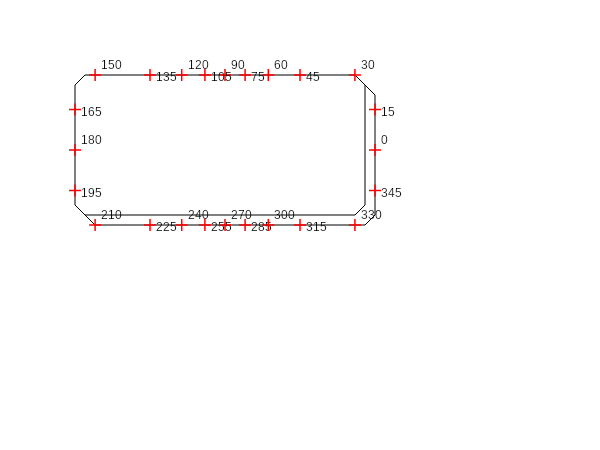

In [45]:
show_room(momapy.sbgn.pd.ComplexMultimerLayout, "self_angle")

In [46]:
m.layout_elements.clear()
StateVariableLayoutBuilder = momapy.builder.get_or_make_builder_cls(momapy.sbgn.pd.StateVariableLayout)

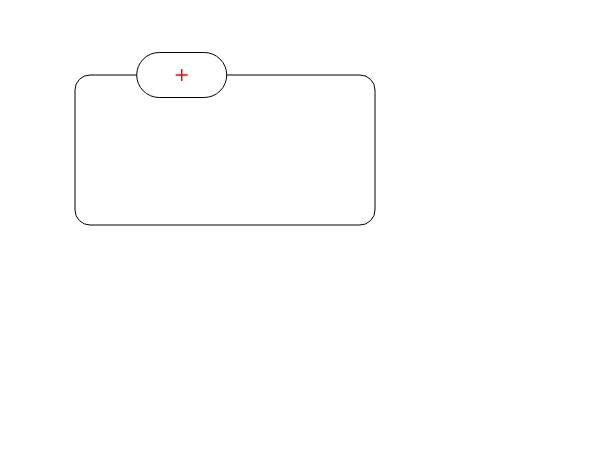

In [47]:
s = StateVariableLayoutBuilder(
    width=90,
    height=45
)
s.position = m.self_angle(120)
m.add_element(s)
cross_point.position = m.self_angle(120)
m.add_element(cross_point)
display(m)

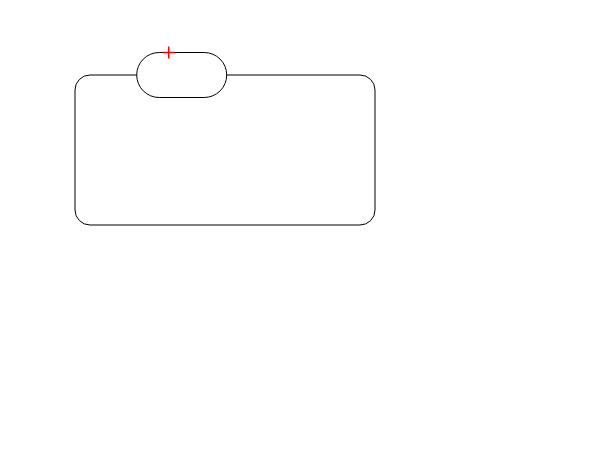

In [48]:
cross_point.position = m.angle(120)
display(m)

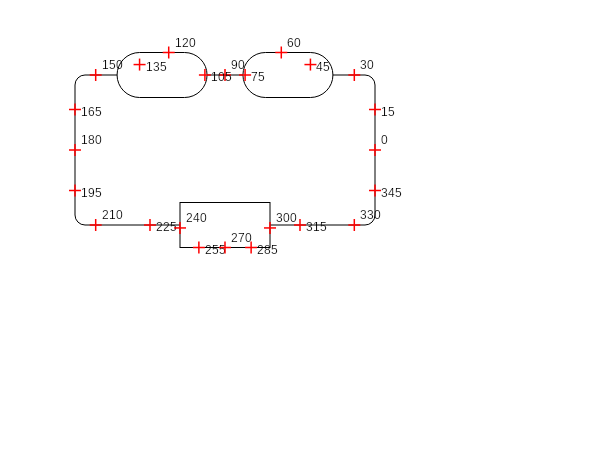

In [49]:
show_room(momapy.sbgn.pd.MacromoleculeLayout, "angle")

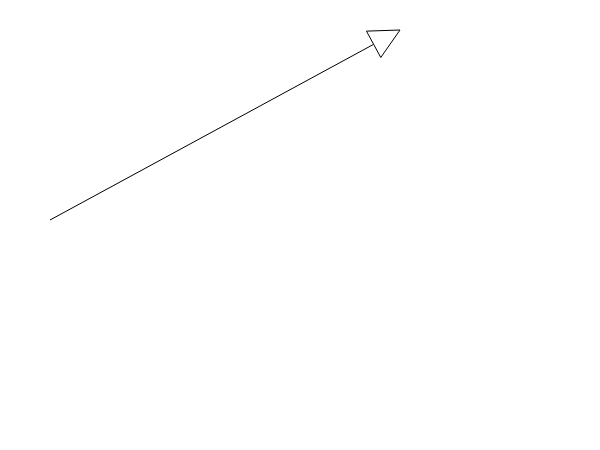

In [50]:
StimulationLayoutBuilder = momapy.builder.get_or_make_builder_cls(momapy.sbgn.pd.StimulationLayout)
s = StimulationLayoutBuilder(
        segments=[momapy.geometry.Segment(momapy.geometry.PointBuilder(50, 220), momapy.geometry.PointBuilder(400, 30))],
        width=30,
        height=30,
        stroke_width=1,
        stroke=momapy.coloring.colors.black,
)
display(s)

In [51]:
s.fraction(0.3)

(Point(x=155.0, y=163.0), 5.785842590832764)

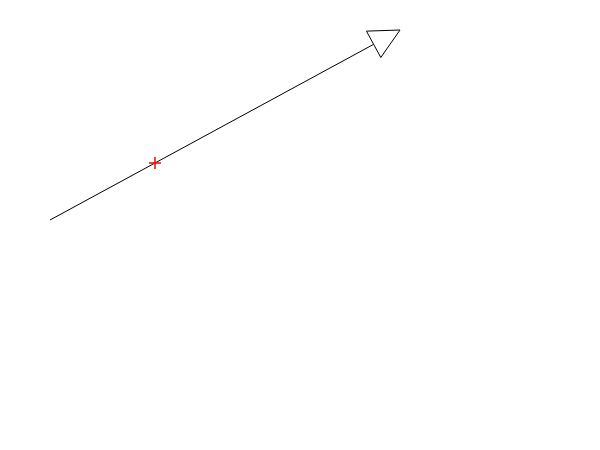

In [52]:
cross_point.position = s.fraction(0.3)[0]
s.add_element(cross_point)
display(s)

In [53]:
s.layout_elements.clear()
CardinalityLayoutBuilder = momapy.builder.get_or_make_builder_cls(momapy.sbgn.pd.CardinalityLayout)

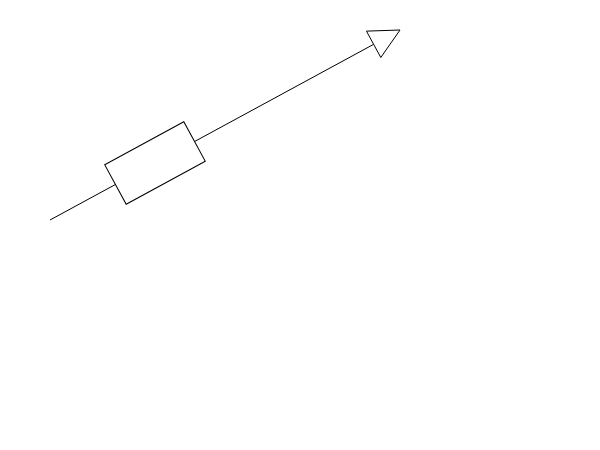

In [54]:
c = CardinalityLayoutBuilder(
    width=90,
    height=45,
)
position, angle = s.fraction(0.3)
c.position = position
c.transform = tuple([momapy.geometry.Rotation(angle, position)])
s.add_element(c)
display(s)

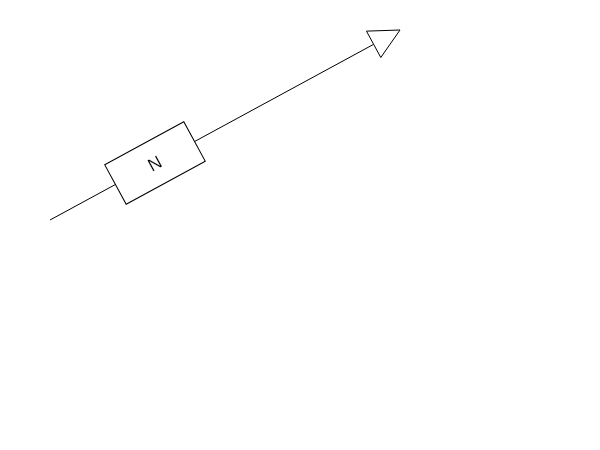

In [55]:
label=momapy.core.TextLayoutBuilder(
    text="N",
    font_family="Arial",
    font_size=18,
    position=c.label_center()
)
c.label = label
display(s)

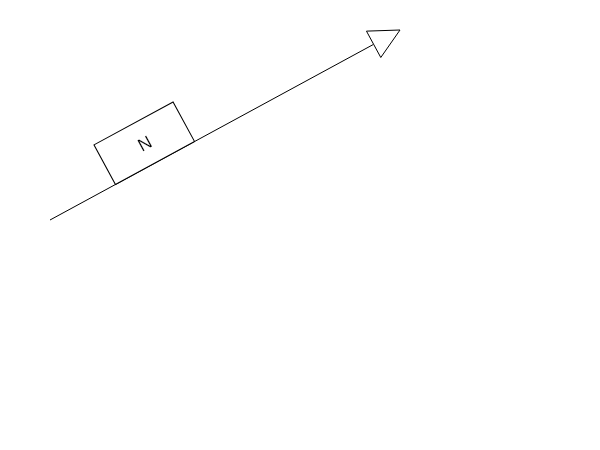

In [56]:
momapy.positioning.set_fraction_of(c, s, 0.3, anchor="south")
c.label.position = c.label_center()
display(s)